In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
# read data based on selected columns, filter to purchasing events, and create unique transaction identifier
iter_csv = pd.read_csv('trnsact.csv',header=None,usecols = [0,1,2,3,4,5,6,7,10], dtype=str,iterator=True, chunksize=10000)
df = pd.concat([chunk[(chunk[6] =='P')] for chunk in iter_csv])
df.columns = ['SKU','STORE','REGISTER','TRANNUM','SEQ','DATE','STYPE','QUANTITY','ORGPRICE']


df['transaction_code'] = df['STORE'] + "/" + df['REGISTER'] + "/" + df['TRANNUM'] + '/' + df['DATE']

In [68]:
#Load SKUINFO Data
skuinfodf = pd.read_csv('skuinfo.csv',header=None,usecols = [0,1,2,3,4,5,6,7,8,9],dtype=str)
skuinfodf.columns = ['SKU','DEPT','CLASSID','UPC','STYLE','COLOR','SIZE','PACKAGE','VENDOR','BRAND']

In [4]:
#Select Top 10 Largest Store by transactions
top10stores = df.groupby(by=['STORE']).agg({'transaction_code':'count'}).sort_values(['transaction_code'],ascending=False).head(10)

In [12]:
# Convert index of top 10 largest store into a list
listoftop10stores = top10stores.index.tolist()

In [13]:
# Covert Date String to DateTime Format
from datetime import datetime
def convertdate(x):
    return datetime.strptime(x,"%Y-%m-%d")
df['DATE'] = df['DATE'].apply(convertdate)
    

In [14]:
# Find most recent date
df.DATE.max()

Timestamp('2005-08-27 00:00:00')

In [15]:
#Filter Date to only include DATE earlier than 6 months before 2005-08-27, which is 2005-02-27
df = df[df['DATE'] > datetime.strptime('2005-02-27',"%Y-%m-%d")]

In [16]:
# Trim dataset to only columns that are needed for analysis
df_analyze = df.drop(['REGISTER','TRANNUM','SEQ','DATE','STYPE'],axis=1)
# Further Trim dataset to only include random subset of stores in analysis
df_analyze = df_analyze[df_analyze.STORE.isin(listoftop10stores)]
df_analyze.drop(['STORE'],axis=1,inplace=True)

(array([9.42716e+05, 3.88502e+05, 0.00000e+00, 1.83013e+05, 8.39510e+04,
        0.00000e+00, 4.02890e+04, 0.00000e+00, 2.70880e+04, 1.31110e+04,
        0.00000e+00, 9.95700e+03, 5.75000e+03, 0.00000e+00, 4.06800e+03,
        0.00000e+00, 2.35800e+03, 2.51200e+03, 0.00000e+00, 1.21100e+03,
        9.98000e+02, 0.00000e+00, 6.35000e+02, 0.00000e+00, 6.19000e+02,
        4.02000e+02, 0.00000e+00, 4.11000e+02, 0.00000e+00, 2.13000e+02,
        2.31000e+02, 0.00000e+00, 1.50000e+02, 1.18000e+02, 0.00000e+00,
        9.40000e+01, 0.00000e+00, 1.70000e+02, 7.50000e+01, 0.00000e+00,
        6.90000e+01, 5.30000e+01, 0.00000e+00, 4.40000e+01, 0.00000e+00,
        2.70000e+01, 2.50000e+01, 0.00000e+00, 3.30000e+01, 1.35000e+02]),
 array([ 1.  ,  1.62,  2.24,  2.86,  3.48,  4.1 ,  4.72,  5.34,  5.96,
         6.58,  7.2 ,  7.82,  8.44,  9.06,  9.68, 10.3 , 10.92, 11.54,
        12.16, 12.78, 13.4 , 14.02, 14.64, 15.26, 15.88, 16.5 , 17.12,
        17.74, 18.36, 18.98, 19.6 , 20.22, 20.84, 21.46

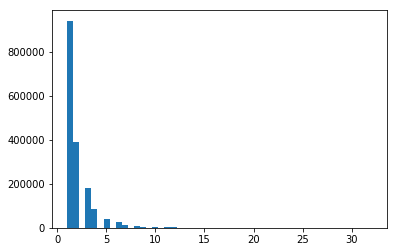

In [18]:
# Histogram of how many SKU's are there in one basket
TRANSACTION_GROUPS = df_analyze.groupby(by = ['transaction_code'])
dat_summary_trans = TRANSACTION_GROUPS.agg({'SKU':'count',})
dat_summary_trans.sort_values(['SKU'],ascending=False).head()

plt.hist(dat_summary_trans['SKU'],bins=50)

In [23]:
# Covert QUANTITY AND ORGPRICE to numeric
df_analyze['QUANTITY'] = df_analyze['QUANTITY'].apply(pd.to_numeric)
df_analyze['ORGPRICE'] = df_analyze['ORGPRICE'].apply(pd.to_numeric)

(array([3.093248e+06, 2.500500e+05, 2.495200e+04, 6.791000e+03,
        4.628000e+03, 1.611000e+03, 1.780000e+03, 5.600000e+02,
        6.550000e+02, 9.560000e+02, 8.200000e+01, 2.380000e+02,
        6.000000e+00, 7.000000e+01, 5.500000e+01, 0.000000e+00,
        1.900000e+01, 0.000000e+00, 0.000000e+00, 1.500000e+01,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

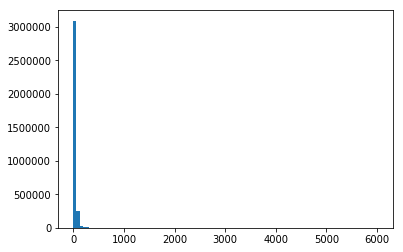

In [127]:
# Identify buckets in ORGPRICE
plt.hist(df_analyze['ORGPRICE'],bins = 100)

In [135]:
# Created table that contains the orgprice distribution of the data
df_prices = pd.DataFrame(data = {'Price':[60.17,  120.34,  180.51,  240.68,  300.85,  361.02,
         421.19,  481.36,  541.53,  601.7 ,  661.87,  722.04,  782.21,
         842.38,  902.55,  962.72,1022.89],'Frequency':[3.093248e+06, 2.500500e+05, 2.495200e+04, 6.791000e+03,
        4.628000e+03, 1.611000e+03, 1.780000e+03, 5.600000e+02,
        6.550000e+02, 9.560000e+02, 8.200000e+01, 2.380000e+02,
        6.000000e+00, 7.000000e+01, 5.500000e+01, 0.000000e+00,
        1.900000e+01]})

In [378]:
# Calculate mean_support, std_support, largest_support, smallest_support for each price range, 
# and create a min_support based on mean+15.55std
df_prices['mean_support'] =np.nan
df_prices['std_support'] = np.nan
df_prices['largest_support'] = np.nan
df_prices['smallest_support'] = np.nan 
for i in range(len(df_prices)):
    if df_prices['Price'][i]==df_prices['Price'][0]:
        df_prices['mean_support'][i] = df_analyze[df_analyze['ORGPRICE']<df_prices['Price'][i]].groupby(by='SKU').agg({'SKU':'count'})['SKU'].mean()
        df_prices['std_support'][i] = df_analyze[df_analyze['ORGPRICE']<df_prices['Price'][i]].groupby(by='SKU').agg({'SKU':'count'})['SKU'].std()
        df_prices['largest_support'][i] = df_analyze[df_analyze['ORGPRICE']<df_prices['Price'][i]].groupby(by='SKU').agg({'SKU':'count'})['SKU'].max()
        df_prices['smallest_support'][i] = df_analyze[df_analyze['ORGPRICE']<df_prices['Price'][i]].groupby(by='SKU').agg({'SKU':'count'})['SKU'].min()
    else:
        df_prices['mean_support'][i] = df_analyze[(df_analyze['ORGPRICE']<df_prices['Price'][i]) & (df_analyze['ORGPRICE']>df_prices['Price'][i-1])].groupby(by='SKU').agg({'SKU':'count'})['SKU'].mean()
        df_prices['std_support'][i] = df_analyze[(df_analyze['ORGPRICE']<df_prices['Price'][i]) & (df_analyze['ORGPRICE']>df_prices['Price'][i-1])].groupby(by='SKU').agg({'SKU':'count'})['SKU'].std()
        df_prices['largest_support'][i] = df_analyze[(df_analyze['ORGPRICE']<df_prices['Price'][i]) & (df_analyze['ORGPRICE']>df_prices['Price'][i-1])].groupby(by='SKU').agg({'SKU':'count'})['SKU'].max()
        df_prices['smallest_support'][i] = df_analyze[(df_analyze['ORGPRICE']<df_prices['Price'][i]) & (df_analyze['ORGPRICE']>df_prices['Price'][i-1])].groupby(by='SKU').agg({'SKU':'count'})['SKU'].min()

df_prices['min_support'] = df_prices['mean_support'] + (15.55*df_prices['std_support'])

In [379]:
# Create Table containing each sku's support
dat_summary_sku = df_analyze.groupby(by = 'SKU').agg({'SKU':'count',
                                                     'ORGPRICE':'mean'})
dat_summary_sku.columns = ['SKUCOUNT','mean_price']
dat_summary_sku['Support'] = dat_summary_sku['SKUCOUNT'] / sum(dat_summary_sku['SKUCOUNT'])

In [380]:
#Append Min_support into dat_summary_sku
dat_summary_sku['min_support'] = np.nan
for i in range(len(dat_summary_sku)):
    for j in range (len(df_prices)):
        if dat_summary_sku['mean_price'][i] < df_prices['Price'][j]:
            dat_summary_sku.iloc[i,3] = df_prices['min_support'][j]
            break

In [381]:
# Filter data based on each item's min_support
dat_summary_index = dat_summary_sku[dat_summary_sku['SKUCOUNT']>dat_summary_sku['min_support']].index.tolist()

In [382]:
# Create final dataframe that would be feed into the Apriori Algorithm
df_feed = df_analyze[df_analyze.SKU.isin(dat_summary_index)]

In [384]:
# Print out number of SKUs to confirm that it fits with the 100 SKU requirement
print(df_feed['SKU'].nunique())
print(df_feed['transaction_code'].nunique()) 

100
162406


(array([89.,  8.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.97160431e-05, 1.86967686e-02, 3.73138211e-02, 5.59308736e-02,
        7.45479261e-02, 9.31649786e-02, 1.11782031e-01, 1.30399084e-01,
        1.49016136e-01, 1.67633189e-01, 1.86250241e-01]),
 <a list of 10 Patch objects>)

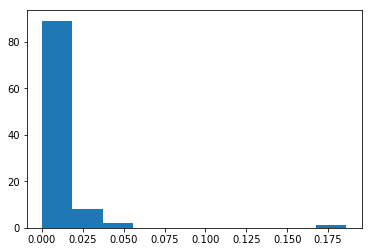

In [387]:
# Understand how support is distributed in the 100 SKUs that are selected
df_feed_summary = df_feed.groupby(by='SKU').agg({'SKU':'count'})
df_feed_summary.columns = ['SKUCOUNT']
df_feed_summary['Support'] = df_feed_summary['SKUCOUNT'] / sum(df_feed_summary['SKUCOUNT'])
df_feed_summary.sort_values(by='Support',ascending = False)
plt.hist(df_feed_summary.Support)

In [430]:
# Analyze 100 best candidates based on brand
top100_brand = skuinfodf[skuinfodf.SKU.isin(dat_summary_index)].sort_values(by = 'BRAND').groupby(by = 'BRAND').agg({'BRAND':'count'})
top100_brand.columns = ['BRAND_COUNTS']
top100_brand.sort_values(by='BRAND_COUNTS',ascending = False)

,BRAND_COUNTS
BRAND,
CLINIQUE,42
LANCOME,26
NOBLE EX,5
CHANEL I,4
ROSE TRE,4
DESIGNER,3
POLO FAS,3
BEAUTE P,2
EUROITAL,2


In [39]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [385]:
# Convert df_feed into appropriate format for Apriori Algorithm
basket = (df_feed
          .groupby(['transaction_code', 'SKU'])['QUANTITY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('transaction_code'))

In [386]:
# Code transactions that have quantity > 0 into 1, and 0 otherwise
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [389]:
# Run Apriori
frequent_itemsets = apriori(basket_sets,use_colnames=True,min_support = 0.00007)

In [396]:
# Generate Association Rules
rules = association_rules(frequent_itemsets,metric = 'lift',min_threshold=1)

# recalculate support
rules['antecedent support'] = rules['antecedent support'] * len(df_feed) / len(df_analyze)
rules['consequent support'] = rules['consequent support'] * len(df_feed) / len(df_analyze)
rules['support'] = rules['support'] * len(df_feed) / len(df_analyze)
rules['confidence'] = rules['support'] / rules['antecedent support']
rules['lift'] = rules['confidence'] / rules['consequent support']

# Export Rules to Excel for further analysis
rules.drop_duplicates(subset='lift',keep='first').sort_values(by='lift',ascending = False).to_csv('rules3.csv')

In [434]:
rules.sort_values(by='lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2683,"(2494717, 9546798)","(144717, 788874)",0.000023,0.000036,0.000005,0.230769,6337.877743,0.000074,1.299328
2678,"(144717, 788874)","(2494717, 9546798)",0.000036,0.000023,0.000005,0.142857,6337.877743,0.000074,1.166293
2679,"(144717, 9546798)","(788874, 2494717)",0.000025,0.000034,0.000005,0.206897,6119.330235,0.000074,1.260264
2682,"(788874, 2494717)","(144717, 9546798)",0.000034,0.000025,0.000005,0.153846,6119.330235,0.000074,1.181396
2674,"(144717, 788874, 9546798)",(2494717),0.000007,0.000150,0.000005,0.750000,4986.284219,0.000074,3.991454
2687,(2494717),"(144717, 788874, 9546798)",0.000150,0.000007,0.000005,0.034582,4986.284219,0.000074,1.035719
2681,"(788874, 9546798)","(144717, 2494717)",0.000025,0.000048,0.000005,0.210526,4415.287078,0.000074,1.265809
2680,"(144717, 2494717)","(788874, 9546798)",0.000048,0.000025,0.000005,0.109091,4415.287078,0.000074,1.122055
821,(2494717),"(144717, 9546798)",0.000150,0.000025,0.000013,0.086455,3438.816703,0.000184,1.094246
816,"(144717, 9546798)",(2494717),0.000025,0.000150,0.000013,0.517241,3438.816703,0.000184,2.067003


In [397]:
# Analyze Group 1 Basket
skuinfodf[skuinfodf.SKU.isin(['144717','788874','9546798','2494717'])]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKAGE,VENDOR,BRAND
22664,144717,5100,001,000400004717014,166260,ULTRA CORREC,CREAM,3,6041161,CHANEL I
123050,788874,5100,001,000400008874078,391975,ULTRA CORR E,.5OZ JAR,3,6041161,CHANEL I
389162,2494717,5100,001,000400004717249,166350,ULTRA CORREC,NA,3,6041161,CHANEL I
1493399,9546798,5100,001,000400006798954,166655,UC SERUM,1.7 OZ,3,6041161,CHANEL I


In [402]:
# Analyze Group 2 Basket
skuinfodf[skuinfodf.SKU.isin(['9836218','5772500','8963391','8568532','656219'])]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKAGE,VENDOR,BRAND
102542,656219,2200,001,000400006219065,3251,ABSOLUE LTN,ABS LTN,3,0113645,LANCOME
904580,5772500,2200,001,000400002500577,2388,ABSOLUE SERU,NO SIZE,3,0113645,LANCOME
1341854,8568532,2200,001,000400008532856,0500,ABS NIGHT,2.6 OZ.,3,0113645,LANCOME
1403974,8963391,2200,001,000400003391896,8784,EYE CREAM,.5 OUNCE,3,0113645,LANCOME
1538660,9836218,2200,001,000400006218983,2101,ABSOLUE CRM,ABS CREAM,3,0113645,LANCOME


In [403]:
# Analyze Group 3 Basket
skuinfodf[skuinfodf.SKU.isin(['3524026','3559555','3898011','264715','3690654','3968011','2716578','803921','5957568','5618966'])]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKAGE,VENDOR,BRAND
41195,264715,800,002,000400004715026,67GF,TOTAL TURNAR,CREAM,3,5511283,CLINIQUE
125573,803921,800,002,000400003921080,663E02,RINSE OFF,FOAM CLNSR,3,5511283,CLINIQUE
423826,2716578,800,001,000400006578271,6EM7,DDM GEL,1.7 OZ,3,5511283,CLINIQUE
550690,3524026,800,001,000400004026352,68LE,DDML PUMP,4.2 OZ,6,5511283,CLINIQUE
556042,3559555,800,002,000400009555355,667H,7DAY SCRUB,RINSE OFF,3,5511283,CLINIQUE
576827,3690654,800,001,000400000654369,68MG,DDML TUBE,DDML TUBE,3,5511283,CLINIQUE
609531,3898011,800,001,000400008011389,6101,MILD SOAP,W/DISH,6,5511283,CLINIQUE
620229,3968011,800,001,000400008011396,6120,CLARIFY,#2 6 OZ,3,5511283,CLINIQUE
880327,5618966,800,002,000400008966561,6GEH,REP DP WRINK,CONCENTRAT,3,5511283,CLINIQUE
933809,5957568,800,003,000400007568595,63M8,SUP CITY BLO,63M8,3,5511283,CLINIQUE
